In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [38]:
first_meas_row = session.query(measurement).first()
first_meas_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x271ffa96220>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [39]:
first_station_row = session.query(station).first()
first_station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x271ffa53970>,
 'elevation': 3.0,
 'id': 1,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716}

In [41]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [42]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [43]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [44]:
# Find the most recent date in the data set.
for row in session.query(func.max(measurement.date)):
    print(row)

('2017-08-23',)


In [79]:
for row in session.query(measurement.date,measurement.prcp,measurement.station).filter(measurement.date >= '2016-08-23'):
    print(row)

('2016-08-23', 0.0, 'USC00519397')
('2016-08-24', 0.08, 'USC00519397')
('2016-08-25', 0.08, 'USC00519397')
('2016-08-26', 0.0, 'USC00519397')
('2016-08-27', 0.0, 'USC00519397')
('2016-08-28', 0.01, 'USC00519397')
('2016-08-29', 0.0, 'USC00519397')
('2016-08-30', 0.0, 'USC00519397')
('2016-08-31', 0.13, 'USC00519397')
('2016-09-01', 0.0, 'USC00519397')
('2016-09-02', 0.0, 'USC00519397')
('2016-09-03', 0.0, 'USC00519397')
('2016-09-04', 0.03, 'USC00519397')
('2016-09-05', None, 'USC00519397')
('2016-09-06', None, 'USC00519397')
('2016-09-07', 0.05, 'USC00519397')
('2016-09-08', 0.0, 'USC00519397')
('2016-09-09', 0.03, 'USC00519397')
('2016-09-10', 0.0, 'USC00519397')
('2016-09-11', 0.05, 'USC00519397')
('2016-09-12', 0.0, 'USC00519397')
('2016-09-13', 0.02, 'USC00519397')
('2016-09-14', 1.32, 'USC00519397')
('2016-09-15', 0.42, 'USC00519397')
('2016-09-16', 0.06, 'USC00519397')
('2016-09-17', 0.05, 'USC00519397')
('2016-09-18', 0.0, 'USC00519397')
('2016-09-19', 0.0, 'USC00519397')
('201

In [121]:
prcp_date=session.query(measurement).filter(measurement.date >= '2016-08-23')
station_q=session.query(station)

In [125]:
measurement_df = pd.read_sql(prcp_date.statement, con=session.connection())
measurement_df

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


In [137]:
measurement_sort_clean_df=measurement_df.sort_values("date",ascending=False).dropna()
measurement_sort_clean_df

,id,station,date,prcp,tobs
2229,19550,USC00516128,2017-08-23,0.45,76.0
1528,12187,USC00519523,2017-08-23,0.08,82.0
1008,7635,USC00514830,2017-08-23,0.00,82.0
360,2724,USC00519397,2017-08-23,0.00,81.0
1527,12186,USC00519523,2017-08-22,0.00,82.0
...,...,...,...,...,...
704,7331,USC00514830,2016-08-23,0.05,80.0
361,5091,USC00513117,2016-08-23,0.15,76.0
1881,19202,USC00516128,2016-08-23,0.70,74.0
1192,11851,USC00519523,2016-08-23,0.02,80.0


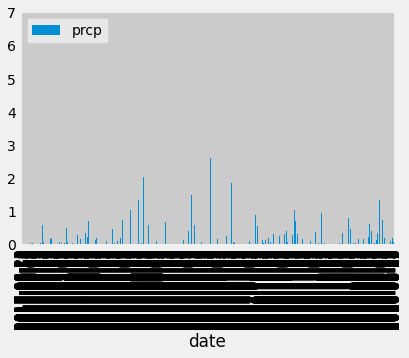

In [120]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

measurement_sort_clean_df.plot.bar(y="prcp")
plt.savefig('Resources\precipitation.png')

,prcp,station
date,,
2016-08-23,0.00,USC00519397
2016-08-24,0.08,USC00519397
2016-08-25,0.08,USC00519397
2016-08-26,0.00,USC00519397
2016-08-27,0.00,USC00519397
...,...,...
2017-08-19,0.09,USC00516128
2017-08-20,NaN,USC00516128
2017-08-21,0.56,USC00516128


In [138]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_sort_clean_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [92]:
station_df = pd.read_sql(station_q.statement, con=session.connection(), index_col="station")
station_df

,id,name,latitude,longitude,elevation
station,,,,,
USC00519397,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
USC00513117,2,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
USC00514830,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
USC00517948,4,"PEARL CITY, HI US",21.39340,-157.97510,11.9
USC00518838,5,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
USC00519523,6,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
USC00511918,8,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
USC00516128,9,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [140]:
stat_meas=pd.merge(measurement_sort_clean_df,station_df,how='inner',on='station')
stat_meas

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,19550,USC00516128,2017-08-23,0.45,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
1,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
2,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
3,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
4,19544,USC00516128,2017-08-17,0.13,72.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
...,...,...,...,...,...,...,...,...,...,...
2016,8842,USC00517948,2016-09-20,0.00,73.0,4,"PEARL CITY, HI US",21.3934,-157.9751,11.9
2017,8840,USC00517948,2016-09-16,0.00,79.0,4,"PEARL CITY, HI US",21.3934,-157.9751,11.9
2018,8830,USC00517948,2016-08-30,0.02,79.0,4,"PEARL CITY, HI US",21.3934,-157.9751,11.9
2019,8828,USC00517948,2016-08-26,0.04,81.0,4,"PEARL CITY, HI US",21.3934,-157.9751,11.9


In [176]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_group=stat_meas.groupby(['station'])

In [187]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_count=station_group['date'].count()
station_sort=station_count.sort_values(ascending=False)
station_sort

station
USC00519397    359
USC00519281    352
USC00513117    343
USC00516128    328
USC00519523    314
USC00514830    265
USC00517948     60
Name: date, dtype: int64

In [192]:
active_station_filt_df=stat_meas[(stat_meas['station']=='USC00519397')]
active_station_filt_df['tobs']

907     81.0
908     82.0
909     81.0
910     81.0
911     79.0
        ... 
1261    77.0
1262    79.0
1263    80.0
1264    79.0
1265    81.0
Name: tobs, Length: 359, dtype: float64

In [195]:
active_station_filt_df['tobs'].describe()

count    359.000000
mean      75.197772
std        4.973381
min       60.000000
25%       72.000000
50%       77.000000
75%       79.000000
max       87.000000
Name: tobs, dtype: float64

In [198]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(x=active_station)

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

# Close session

In [ ]:
# Close Session
session.close()